<a href="https://colab.research.google.com/github/franmazzaro/7506R-2C2023-GRUPO39/blob/main/7506R_TP1_GRUPO39_CHP1_ENTREGA_cuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint

# Exploración Inicial

Comenzamos obteniendo una visualización general del Dataframe y sus tipos de datos

In [6]:
hoteles = pd.read_csv('/content/sample_data/hotels_train.csv')
hoteles.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49.0,2016.0,September,37.0,5.0,1.0,2.0,1.0,0.0,...,No Deposit,9.0,NaN,0.0,Transient,115.5,0.0,1.0,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1.0
1,Resort Hotel,4.0,2015.0,October,44.0,31.0,0.0,1.0,2.0,0.0,...,No Deposit,NaN,NaN,0.0,Transient,42.0,1.0,0.0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0.0
2,City Hotel,25.0,2016.0,October,42.0,13.0,0.0,1.0,2.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,229.0,0.0,2.0,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0.0
3,City Hotel,26.0,2016.0,December,51.0,12.0,2.0,5.0,2.0,0.0,...,Non Refund,154.0,NaN,0.0,Transient,75.0,0.0,0.0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1.0
4,City Hotel,104.0,2017.0,March,12.0,19.0,2.0,5.0,2.0,0.0,...,No Deposit,20.0,NaN,0.0,Transient-Party,75.0,0.0,1.0,28c75445-c603-413a-babf-ad377018b592,0.0


In [7]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46421 entries, 0 to 46420
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           46421 non-null  object 
 1   lead_time                       46420 non-null  float64
 2   arrival_date_year               46420 non-null  float64
 3   arrival_date_month              46420 non-null  object 
 4   arrival_date_week_number        46420 non-null  float64
 5   arrival_date_day_of_month       46420 non-null  float64
 6   stays_in_weekend_nights         46420 non-null  float64
 7   stays_in_week_nights            46420 non-null  float64
 8   adults                          46420 non-null  float64
 9   children                        46418 non-null  float64
 10  babies                          46420 non-null  float64
 11  meal                            46420 non-null  object 
 12  country                         

In [51]:
hoteles.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,46420.000000,46420.000000,46420.000000,46420.000000,46420.000000,46420.000000,46420.000000,46418.000000,46420.000000,46420.000000,46420.000000,46420.000000,46420.000000,40518.000000,2373.000000,46420.000000,46420.000000,46420.000000,46420.000000,46420.000000
mean,112.139703,2016.152520,27.224968,15.773675,0.922900,2.499698,1.862021,0.104808,0.006958,0.028070,0.115791,0.118763,0.196639,84.679723,189.386431,2.625765,102.414855,0.049763,0.521693,0.498190
std,110.975655,0.710824,13.530361,8.795047,0.991737,1.876982,0.547359,0.401677,0.092684,0.165174,0.984910,1.469791,0.607356,109.437601,130.899886,18.538074,47.857449,0.221385,0.773981,0.500002
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,77.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,186.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,218.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,40.000000,3.000000,9.000000,1.000000,26.000000,70.000000,15.000000,535.000000,543.000000,391.000000,426.250000,8.000000,5.000000,1.000000


## Análisis de variables

### Variables cualitativas

**VARIABLE HOTEL**

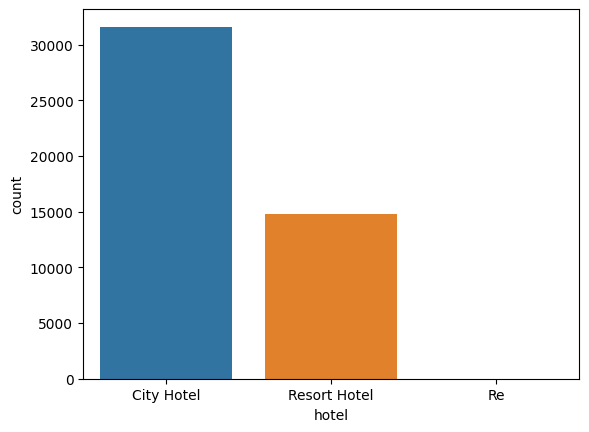

In [8]:
sns.countplot(x='hotel', data=hoteles, )
plt.show()

In [9]:
hoteles["hotel"].value_counts()

City Hotel      31597
Resort Hotel    14823
Re                  1
Name: hotel, dtype: int64

Vemos que hay mas de el doble de reservas del City Hotel que del Resort Hotel.

**VARIABLE ARRIVAL_DATE_MONTH**

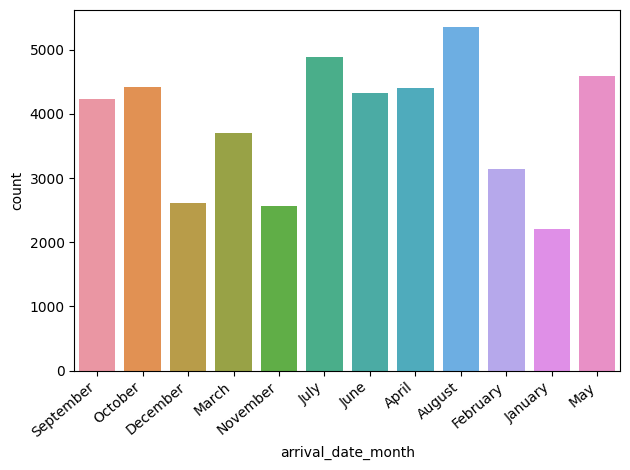

In [10]:
arrival_date_month_grafic = sns.countplot(x='arrival_date_month', data=hoteles, )
arrival_date_month_grafic.set_xticklabels(arrival_date_month_grafic.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

La mayor cantidad de arrivos se dan en agosto.

**VARIABLE MEAL**

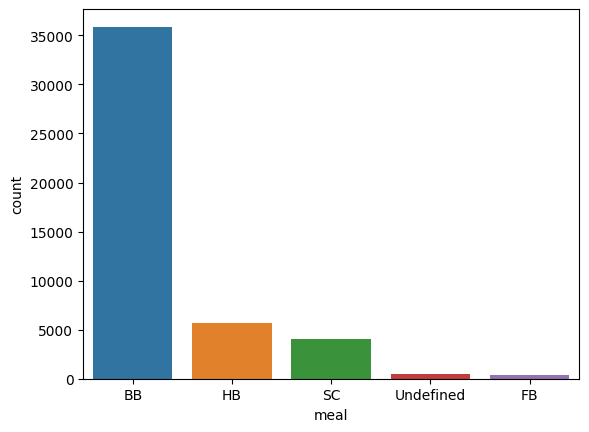

In [11]:
sns.countplot(x='meal', data=hoteles, )
plt.show()

Como vemos el mayor tipo de comida en los hoteles es BB, luego le siguen HB y SC, y en ultimo lugar FB que tiene el mismo volumen que las comidas que no fueron registradas

**VARIABLE COUNTRY**

In [12]:
hoteles["country"].unique()

array(['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU',
       'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL',
       'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF',
       'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS',
       'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU',
       'ARE', nan, 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN',
       'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB',
       'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL',
       'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG',
       'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY',
       'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY',
       'ETH', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA',
       'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE',
       'CAF', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'TJK', 'LKA',
       'HND', 'P

Vemos que hay reservas de hotel en varios paises, hacemos un ranking de los 10 que mas aparecen

<Axes: xlabel='count', ylabel='country'>

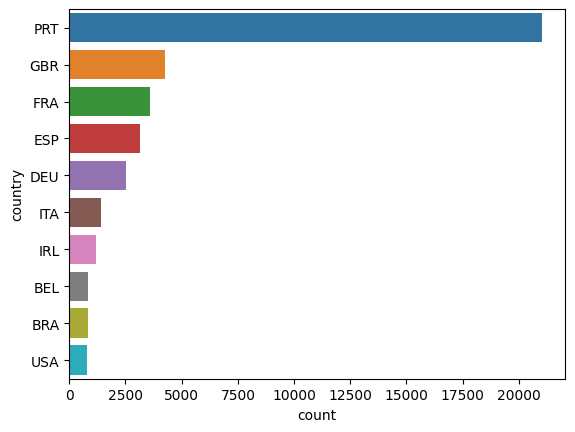

In [13]:
sns.countplot(data=hoteles, y="country", order=hoteles.country.value_counts().iloc[:10].index)

El pais con mas reservas de hotel del dataset es Portugal, con mas de 25.000

VARIABLE MARKET SEGMENT

In [14]:
hoteles["market_segment"].unique()

array(['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Complementary',
       'Corporate', 'Aviation', 'Undefined', nan], dtype=object)

Estas son todos los tipos de segmentos de mercado de todas las reservas de hotel del dataset

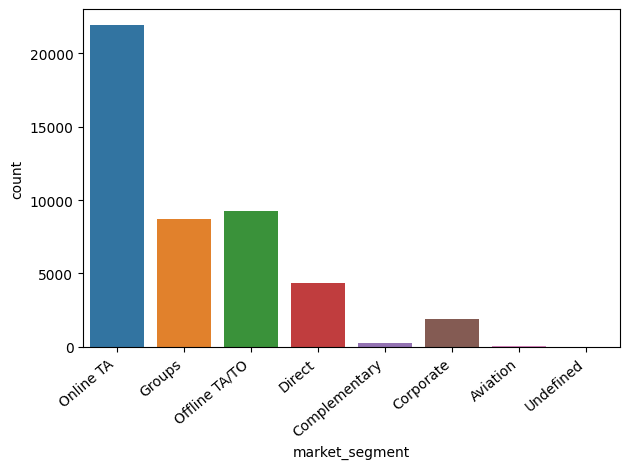

In [15]:
market_segment_grafic = sns.countplot(x='market_segment', data=hoteles, )
market_segment_grafic.set_xticklabels(market_segment_grafic.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Vemos que Online TA es el segmento de mercado que está mas presente en todas las reservas de hotel

**VARIABLE DISTRIBUTION_CHANNEL**

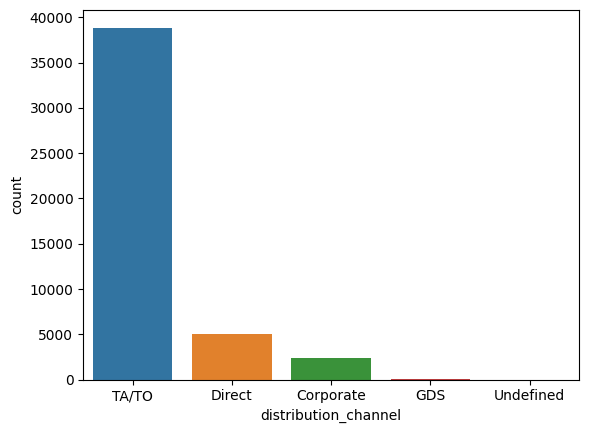

In [16]:
sns.countplot(x='distribution_channel', data=hoteles, )
plt.show()

Vemos que el canal de distribucion que mas se repite en las reservas de hotel es TA/TO

**VARIABLE RESERVED_ROOM_TYPE**

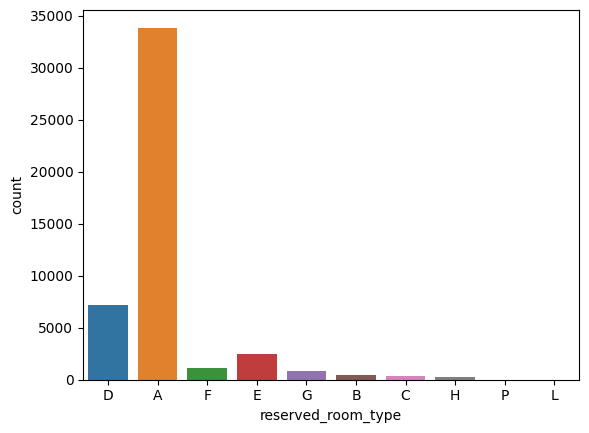

In [17]:
sns.countplot(x='reserved_room_type', data=hoteles, )
plt.show()

Vemos que el tipo de reservas de habitacion son en su gran mayoria de tipo A

**VARIABLE ASSIGNED_ROOM_TYPE**

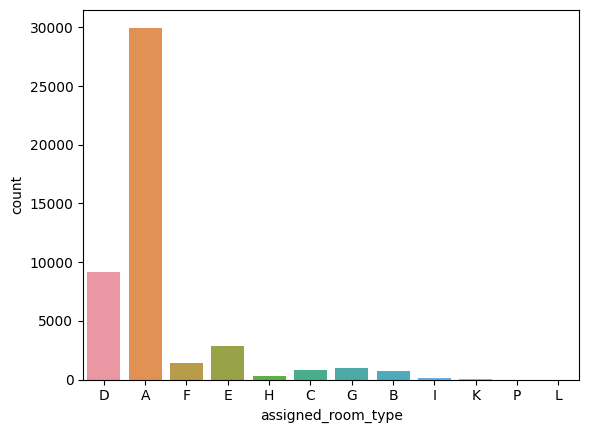

Cantidad de asignacion de habitacion de tipo D: 9121
Cantidad de reservas de habitacion de tipo D: 7157
Cantidad de asignacion de habitacion de tipo A: 29973
Cantidad de reservas de habitacion de tipo A: 33841


In [18]:
sns.countplot(x='assigned_room_type', data=hoteles, )
plt.show()

print(f"Cantidad de asignacion de habitacion de tipo D: {hoteles['assigned_room_type'].value_counts()['D']}")
print(f"Cantidad de reservas de habitacion de tipo D: {hoteles['reserved_room_type'].value_counts()['D']}")

print(f"Cantidad de asignacion de habitacion de tipo A: {hoteles['assigned_room_type'].value_counts()['A']}")
print(f"Cantidad de reservas de habitacion de tipo A: {hoteles['reserved_room_type'].value_counts()['A']}")

Las distribuciones de los tipos de reserva y asignacion de habitaciones pueden parecer parecidas a simple vista por la escala de cantidad.

Observamos que la habitacion de tipo D tiene 2605 mas asignaciones que reservas.
Y la habitacion de tipo A tiene 5127 mas reservas que asignaciones

**VARIABLE DEPOSIT_TYPE**

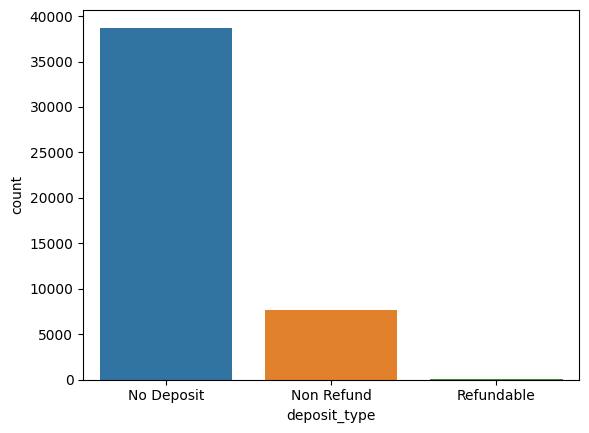

In [19]:
sns.countplot(x='deposit_type', data=hoteles, )
plt.show()

Como vemos el el tipo de deposito mas comun es: No Deposit

**VARIABLE CUSTOMER_TYPE**

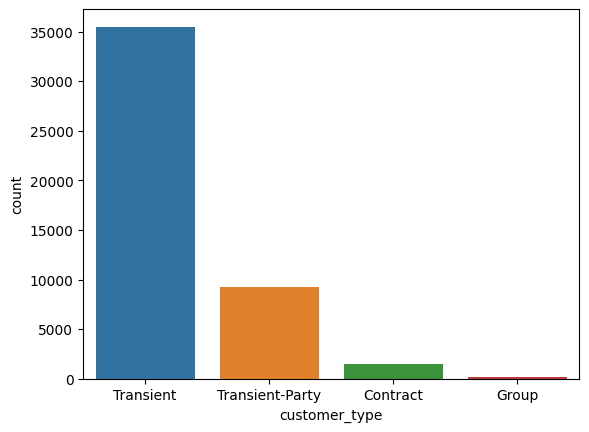

In [20]:
sns.countplot(x='customer_type', data=hoteles, )
plt.show()

En el grafico se ve que el tipo de cliente mas habitual es el transitorio

In [21]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46421 entries, 0 to 46420
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           46421 non-null  object 
 1   lead_time                       46420 non-null  float64
 2   arrival_date_year               46420 non-null  float64
 3   arrival_date_month              46420 non-null  object 
 4   arrival_date_week_number        46420 non-null  float64
 5   arrival_date_day_of_month       46420 non-null  float64
 6   stays_in_weekend_nights         46420 non-null  float64
 7   stays_in_week_nights            46420 non-null  float64
 8   adults                          46420 non-null  float64
 9   children                        46418 non-null  float64
 10  babies                          46420 non-null  float64
 11  meal                            46420 non-null  object 
 12  country                         

### Variables cuantitativas

In [22]:
hoteles_cuanti = hoteles[["lead_time","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations","previous_cancellations","previous_bookings_not_canceled","booking_changes","agent","company","days_in_waiting_list","adr","required_car_parking_spaces","total_of_special_requests","is_canceled"]]

In [23]:
matriz_corr=hoteles_cuanti.corr()
matriz_corr

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.024109,0.135369,-0.005573,0.064985,0.141465,0.114834,-0.046287,-0.022786,-0.108827,...,0.094264,-0.066243,-0.023841,-0.078263,0.146153,0.164795,-0.095668,-0.113891,-0.125157,0.296605
arrival_date_year,0.024109,1.000000,-0.544524,-0.001370,0.026980,0.039255,0.034102,0.062761,-0.012839,-0.008208,...,-0.141942,0.023242,0.028932,0.085156,0.241754,-0.058474,0.216188,-0.013049,0.107777,0.020112
arrival_date_week_number,0.135369,-0.544524,1.000000,0.058279,0.014921,0.012423,0.023852,0.006404,0.018920,-0.018615,...,0.044596,-0.020597,0.011649,-0.044693,-0.037721,0.020649,0.075125,0.002915,0.027407,0.006185
arrival_date_day_of_month,-0.005573,-0.001370,0.058279,1.000000,-0.013515,-0.024069,0.006634,0.011287,0.000716,-0.006793,...,-0.033294,-0.005572,0.012522,0.002617,0.046597,0.027258,0.032950,0.001447,0.008722,-0.006432
stays_in_weekend_nights,0.064985,0.026980,0.014921,-0.013515,1.000000,0.483631,0.085212,0.047424,0.023649,-0.081608,...,-0.012364,-0.037465,0.042767,0.151753,0.068524,-0.056410,0.060904,-0.015002,0.071740,0.003390
stays_in_week_nights,0.141465,0.039255,0.012423,-0.024069,0.483631,1.000000,0.095587,0.057145,0.020383,-0.089923,...,-0.015929,-0.043682,0.073279,0.199871,0.209715,-0.005218,0.084066,-0.021583,0.074691,0.028670
adults,0.114834,0.034102,0.023852,0.006634,0.085212,0.095587,1.000000,0.032278,0.014254,-0.142543,...,-0.004530,-0.101122,-0.046497,-0.035390,0.188386,-0.009237,0.248176,0.012397,0.119320,0.062257
children,-0.046287,0.062761,0.006404,0.011287,0.047424,0.057145,0.032278,1.000000,0.025547,-0.027459,...,-0.027791,-0.019041,0.053630,0.053527,0.029735,-0.035753,0.360495,0.040190,0.077210,0.008089
babies,-0.022786,-0.012839,0.018920,0.000716,0.023649,0.020383,0.014254,0.025547,1.000000,-0.008537,...,-0.007410,-0.005276,0.094712,0.034173,0.037983,-0.010446,0.029939,0.038770,0.091442,-0.030177
is_repeated_guest,-0.108827,-0.008208,-0.018615,-0.006793,-0.081608,-0.089923,-0.142543,-0.027459,-0.008537,1.000000,...,0.083708,0.397300,0.008542,0.014557,-0.239378,-0.021616,-0.134729,0.066077,0.016554,-0.088726


<Axes: >

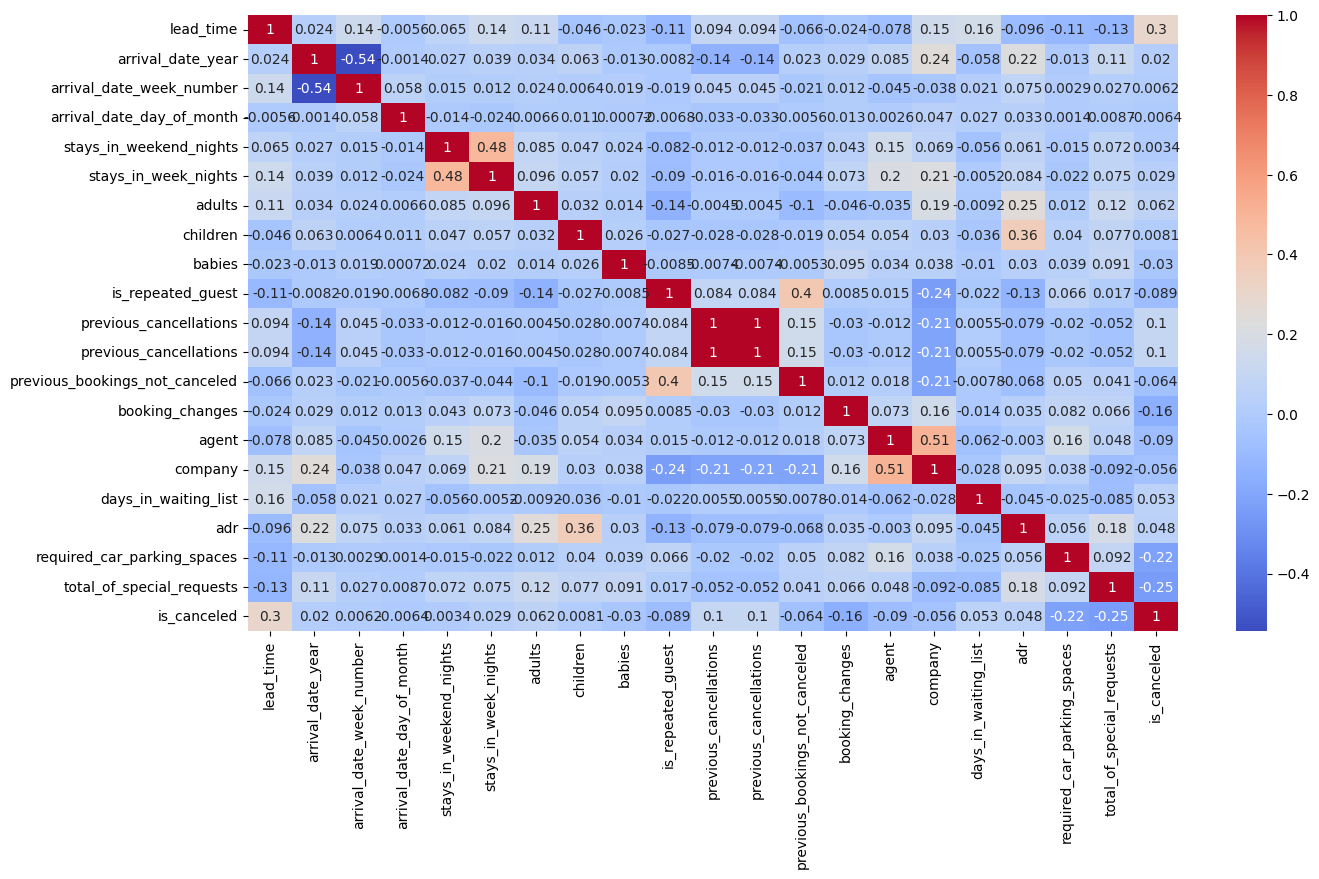

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

In [90]:
hoteles_cuanti.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,49.0,2016.0,37.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,NaN,0.0,115.5,0.0,1.0,1.0
1,4.0,2015.0,44.0,31.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,42.0,1.0,0.0,0.0
2,25.0,2016.0,42.0,13.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,9.0,NaN,0.0,229.0,0.0,2.0,0.0
3,26.0,2016.0,51.0,12.0,2.0,5.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,154.0,NaN,0.0,75.0,0.0,0.0,1.0
4,104.0,2017.0,12.0,19.0,2.0,5.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,NaN,0.0,75.0,0.0,1.0,0.0


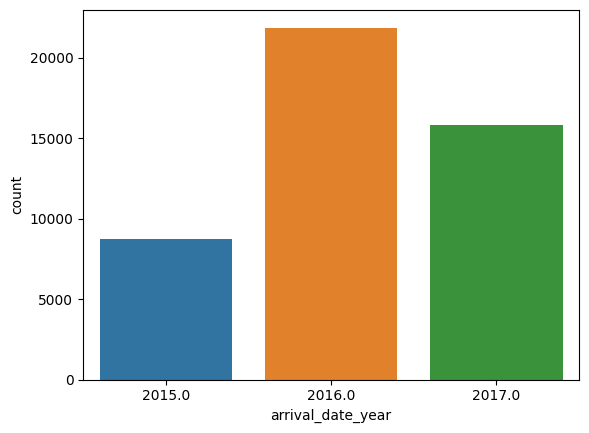

In [67]:
sns.countplot(x='arrival_date_year', data=hoteles, )
plt.show()

En 2016 hubo la mayor cantidad de huespedes.

Filitramos el dataset para analizar sólo las variables numéricas

In [60]:
df_var_cual = hoteles.select_dtypes(include=['int'])
df_var_cual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46421 entries, 0 to 46420
Empty DataFrame


Graficamos la media, mediana y moda para todas las variables

In [61]:
df_var_cual.mean()

Series([], dtype: float64)

<BarContainer object of 0 artists>

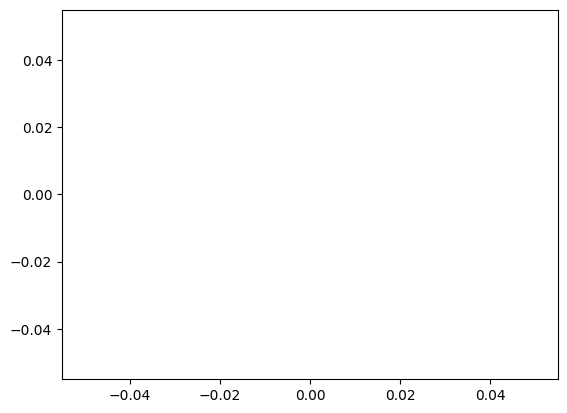

In [27]:
fig, ax = plt.subplots()
eje_x = df_var_cual.columns.to_list()
eje_y = [round(elem, 2) for elem in df_var_cual.mean().values.tolist()]
ax.bar(eje_x, eje_y)

## Datos Faltantes

In [28]:
hoteles.isna().sum()

hotel                                 0
lead_time                             1
arrival_date_year                     1
arrival_date_month                    1
arrival_date_week_number              1
arrival_date_day_of_month             1
stays_in_weekend_nights               1
stays_in_week_nights                  1
adults                                1
children                              3
babies                                1
meal                                  1
country                             158
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              5903
company                           44048
days_in_waiting_list                  1


Vemos que country, agent y company tienen mayor cantidad de valores faltantes

Veamos que porcentaje de datos faltantes hay sobre el total en cada columna

In [54]:
filas_totales=hoteles.shape[0]
print(hoteles.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.002154
arrival_date_year                  0.002154
arrival_date_month                 0.002154
arrival_date_week_number           0.002154
arrival_date_day_of_month          0.002154
stays_in_weekend_nights            0.002154
stays_in_week_nights               0.002154
adults                             0.002154
children                           0.006463
babies                             0.002154
meal                               0.002154
country                            0.340363
market_segment                     0.002154
distribution_channel               0.002154
is_repeated_guest                  0.002154
previous_cancellations             0.002154
previous_bookings_not_canceled     0.002154
reserved_room_type                 0.002154
assigned_room_type                 0.002154
booking_changes                    0.002154
deposit_type                       0.002154
agent                           

**TO DO: GRAFICAR PORCENTAJE DE DATOS FALTANTES**

In [59]:
print("Porcentaje de valores faltantes sobre el total:")
print("Porcentaje agent:  12,71%")
print("Porcentaje company:  94,88%")

Porcentaje de valores faltantes sobre el total:
Porcentaje agent:  12,71%
Porcentaje company:  94,88%


Podemos ver que la variable company en su mayoria esta sin valor, por la que podriamos tomar la decision de eliminarla.

En cambio en agent podriamos ver algun metodo para rellenar los datos faltantes.

Vemos si existen filas duplicadas

In [53]:
hoteles[hoteles.duplicated(keep=False)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


No existen filas duplicadas

# Valores atipicos

In [106]:
hoteles_cuanti_invalido = hoteles_cuanti.copy()

hoteles_cuanti_invalido = hoteles_cuanti_invalido[(hoteles_cuanti_invalido["adults"] == 0) & ((hoteles_cuanti_invalido["children"] > 0) | (hoteles_cuanti_invalido["babies"] > 0)) ]

hoteles_cuanti_invalido.shape

(94, 21)

Podemos ver que hay 94 filas en las cuales no hay adultos pero si hay chicos o bebes. Esto no podria ser posible

TO DO: Decidir si eliminar estos valores